# Distribuição de logs dos usuários

Neste Notebook, procura-se identificar como se comportam os logs dos usuários com o passar dos dias, baseado em features extraídos do arquivo anonimized_logs.csv.





In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
logData = pd.read_csv("/content/drive/My Drive/Dados_Alura/anonimized_logs.csv") 

In [4]:
def getDateDiff(date1, date2):
  date1_parsed = date1.split('-')
  date2_parsed = date2.split('-')
  date1_obj = datetime.datetime(int(date1_parsed[0]), int(date1_parsed[1]),int(date1_parsed[2]))
  date2_obj = datetime.datetime(int(date2_parsed[0]), int(date2_parsed[1]), int(date2_parsed[2]))
  return((date2_obj-date1_obj).days)

In [5]:
def basicStatistic(data):
  st = np.array([data.max(), data.min(), data.mean(), np.median(data), np.std(data)])
  sr = pd.Series(st, index =["max","min","média","mediano","des. pad."])
  print(sr) 

In [6]:
def dist_diarias(logData_user):

  logData_user.head()

  atividades = logData_user['moment'].value_counts()


  atividades = atividades.rename_axis('moment').reset_index(name='counts')

  atividades = atividades.sort_values(by = 'moment')

  atividades = atividades.reset_index(drop = True)

  datas = atividades['moment'].values



  dias = getDateDiff(datas[0],datas[datas.shape[0]-1])+1


  intervalo = np.zeros(dias)

  intervalo[0] = atividades.at[0,'counts']
  diaAtual = 0

  for i in range(len(atividades.index) - 1):
  
    dif_dia = getDateDiff(atividades.at[i,'moment'],atividades.at[i+1,'moment'])
    intervalo[dif_dia + diaAtual] = atividades.at[i,'counts']
    diaAtual = dif_dia + diaAtual

  return intervalo

In [8]:
 uniqueUserLogCount = logData.user_uuid.value_counts()

In [9]:
size = uniqueUserLogCount.values[uniqueUserLogCount.values>500].shape[0]


users =  uniqueUserLogCount.index[:size]

log_density = np.zeros((size))
daily_log_density = np.zeros((size))
interval = np.zeros((size))
log_counts = uniqueUserLogCount.values[:size]

#intervalos = np.array(size)

intervalos = []
aluno_mais_tempo = []
aluno_mais_int = []
aluno_aleatório = []

is_user =  logData['user_uuid']==users[0]
logData_user_maior = logData[is_user]

for i in range (size):
  is_user =  logData['user_uuid']==users[i]
  logData_user = logData[is_user]
  sorted_logData_user = logData_user.sort_values(by = 'moment')
  dates = sorted_logData_user['moment'].values
  interval[i]=(getDateDiff(dates[0],dates[dates.shape[0]-1])+1)
  log_density[i]=sorted_logData_user.moment.value_counts().index.shape[0] / interval[i]
  daily_log_density[i] = sorted_logData_user.moment.value_counts().mean()
  intervalos.append(dist_diarias(logData_user))


  if (len(logData_user.index) > len(logData_user_maior.index)):
    logData_user_maior = logData_user
    aluno_mais_int = dist_diarias(logData_user)
  
  if (len(dist_diarias(logData_user)) > len(aluno_mais_tempo)):
    aluno_mais_tempo = dist_diarias(logData_user)
  

In [10]:
aluno_mais_int = dist_diarias(logData_user_maior)

In [11]:
aluno_aleatório = intervalos[282]

In [12]:
def plot_dist(intervalo, a = 0, b = 0):
  plt.bar(np.arange(len(intervalo)),intervalo)
  plt.suptitle('Distribuição das interações diarias de um usuário', fontsize=10)
  if (b):
    plt.xlim(a, b)
    plt.ylim(0, max(intervalo[a:b]) + 2)
  plt.xlabel('Dias', fontsize=12)
  plt.ylabel('Interações no dia', fontsize=12)
  plt.show()

In [13]:
aluno_mais_int = [1]
for i in range(len(intervalos)):
  if (max(intervalos[i]) > max(aluno_mais_int)) and (max(intervalos[i]) <= 160):
    aluno_mais_int = intervalos[i]


## Distribuição de um usuário com muitas interações

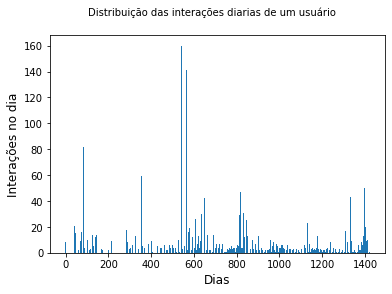

In [14]:
plot_dist(aluno_mais_int)

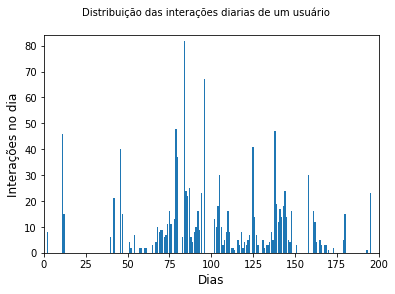

In [15]:
plot_dist(aluno_mais_int,0,200)

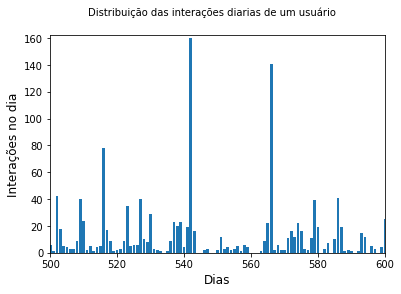

In [16]:
plot_dist(aluno_mais_int,500, 600)

## Distribuição de um usuário com muitos dias de assinatura

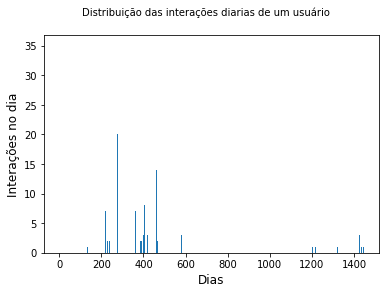

In [17]:
plot_dist(aluno_mais_tempo)

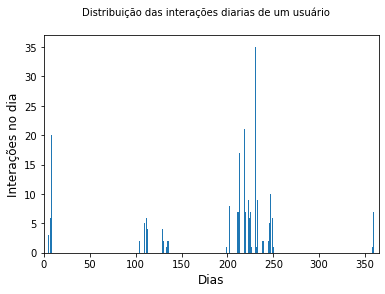

In [18]:
plot_dist(aluno_mais_tempo,0,365)

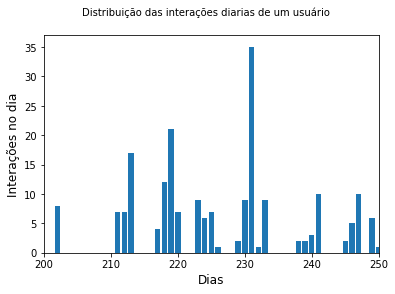

In [19]:
plot_dist(aluno_mais_tempo, 200 , 250)

## Distribuição de um aluno aleatório

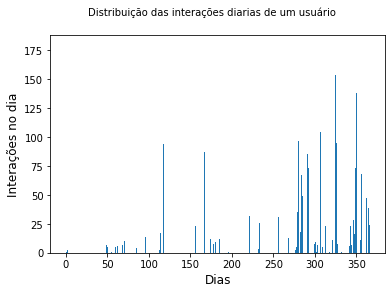

In [20]:
plot_dist(aluno_aleatório)

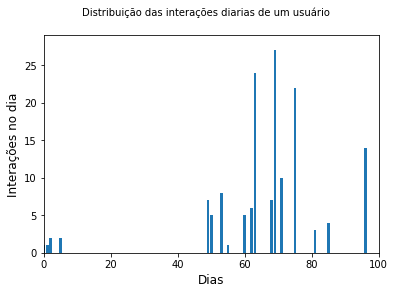

In [21]:
plot_dist(aluno_aleatório,0 , 100)

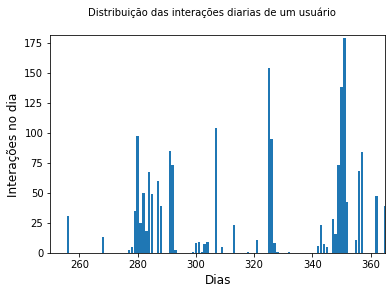

In [22]:
plot_dist(aluno_aleatório, 250, 365)